In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon, iradon

Circle Coordinates (Fruit): [21 21 21 ... 79 79 79] [43 44 45 ... 55 56 57]
Circle Coordinates (Seed): [58 58 58 58 58 58 58 59 59 59 59 59 59 59 59 59 59 59 60 60 60 60 60 60
 60 60 60 60 60 60 60 61 61 61 61 61 61 61 61 61 61 61 61 61 62 62 62 62
 62 62 62 62 62 62 62 62 62 62 62 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 68 68 68 68 68 68 68 68 68 68
 68 68 68 68 68 69 69 69 69 69 69 69 69 69 69 69 69 69 70 70 70 70 70 70
 70 70 70 70 70 70 70 71 71 71 71 71 71 71 71 71 71 71 72 72 72 72 72 72
 72] [47 48 49 50 51 52 53 45 46 47 48 49 50 51 52 53 54 55 44 45 46 47 48 49
 50 51 52 53 54 55 56 44 45 46 47 48 49 50 51 52 53 54 55 56 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 43 44 45 46 47 48 49
 50 51 52 53 54 

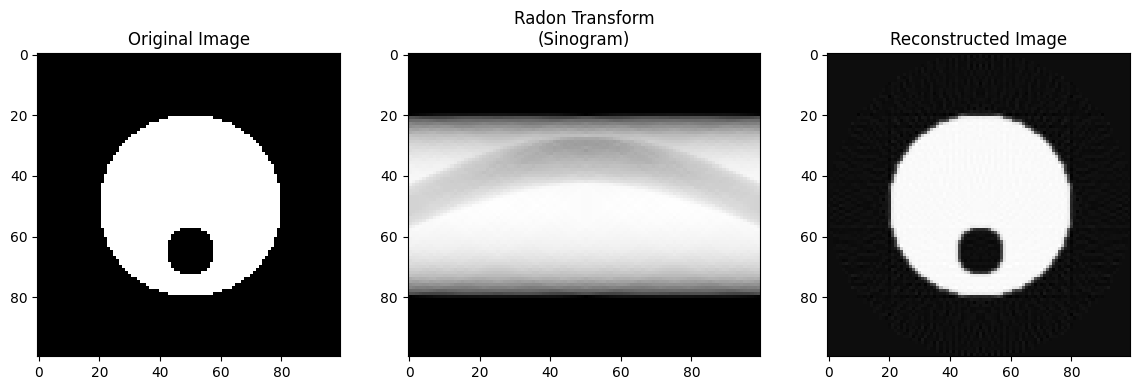

In [13]:
# Creating an image of 100x100
image = np.zeros((100, 100), dtype=np.uint8)

# Creating a circular 'fruit'
rr, cc = disk((50, 50), 30)
image[rr, cc] = 1  # Fill the circle with ones

# Print coordinates of the first disk
print("Circle Coordinates (Fruit):", rr, cc)

# Creating a smaller circular 'seed'
rr, cc = disk((65, 50), 8)
image[rr, cc] = 0  # Fill the smaller circle (seed) with zeros

# Print coordinates of the second disk
print("Circle Coordinates (Seed):", rr, cc)

# Generate a range of angles for Radon transform
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
print("Theta (Angles):", theta)

# Generate projections using Radon transform
projections = radon(image, theta=theta, circle=True)
print("Projections (Radon Transform):", projections)

# Reconstruct the image using inverse Radon transform
reconstructed_image = iradon(projections, theta=theta, circle=True)

# Display the original, projections, and reconstructed images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the original image
axes[0].imshow(image, cmap=plt.cm.Greys_r)
axes[0].set_title("Original Image")

# Plot the projections (sinogram)
axes[1].imshow(projections, cmap=plt.cm.Greys_r, aspect='auto')
axes[1].set_title("Radon Transform\n(Sinogram)")

# Plot the reconstructed image
axes[2].imshow(reconstructed_image, cmap=plt.cm.Greys_r)
axes[2].set_title("Reconstructed Image")

plt.tight_layout()
plt.show()

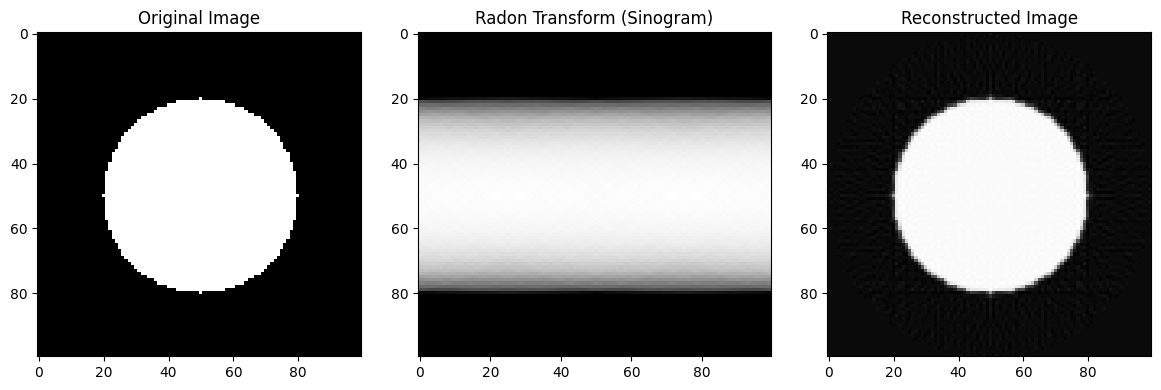

In [23]:
import numpy as np
from skimage.transform import radon, iradon
import matplotlib.pyplot as plt

# Create a simple synthetic image
image = np.zeros((100, 100), dtype=np.uint8)
rr, cc = np.ogrid[:100, :100]
circle = (rr - 50)**2 + (cc - 50)**2 <= 30**2
image[circle] = 1  # Fill circle with ones

# Perform Radon Transform
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)

# Perform Inverse Radon Transform (Reconstruction)
reconstructed_image = iradon(sinogram, theta=theta, circle=True)

# Display original, sinogram, and reconstructed images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original image
axes[0].imshow(image, cmap=plt.cm.Greys_r)
axes[0].set_title('Original Image')

# Sinogram (Radon Transform)
axes[1].imshow(sinogram, cmap=plt.cm.Greys_r, aspect='auto')
axes[1].set_title('Radon Transform (Sinogram)')

# Reconstructed image
axes[2].imshow(reconstructed_image, cmap=plt.cm.Greys_r)
axes[2].set_title('Reconstructed Image')

plt.tight_layout()
plt.show()


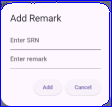

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import this for Colab

# Load the image
image = cv2.imread('/content/Screenshot 2024-07-22 164438.png')

# Resize the image for faster processing (optional, adjust size as needed)
scale_percent = 50  # Percentage of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

# Convert to grayscale and apply threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Distance transform and create markers for multiple seeds
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# Apply a threshold to create markers
_, markers = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
markers = np.uint8(markers)

# Find connected components to create markers
_, markers = cv2.connectedComponents(markers)

# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

# Display the result using cv2_imshow (Colab-specific)
cv2_imshow(image)



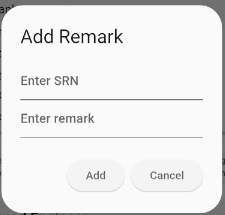

In [11]:
#KNN-Based Region Growing for Image Segmentation
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from google.colab.patches import cv2_imshow  # Use cv2_imshow in Colab

# Load image
image = cv2.imread('/content/Screenshot 2024-07-22 164438.png', 0)

# Check if the image was loaded correctly
if image is None:
    print("Error: Image not found or failed to load. Check the image path.")
else:
    # Seed points for region growing
    seed_points = [(50, 50), (100, 100), (150, 150)]

    # Define KNN classifier for region growing
    knn = KNeighborsClassifier(n_neighbors=3)

    # Extract features (pixel intensities) and labels (region seeds)
    features = []
    labels = []

    for point in seed_points:
        x, y = point
        intensity = image[x, y]
        features.append([intensity])
        labels.append(1)  # Label region as 1 (e.g., tumor)

    # Additional logic for KNN-based region growing will be added here.

    # Display the image using cv2_imshow (for Colab)
    cv2_imshow(image)


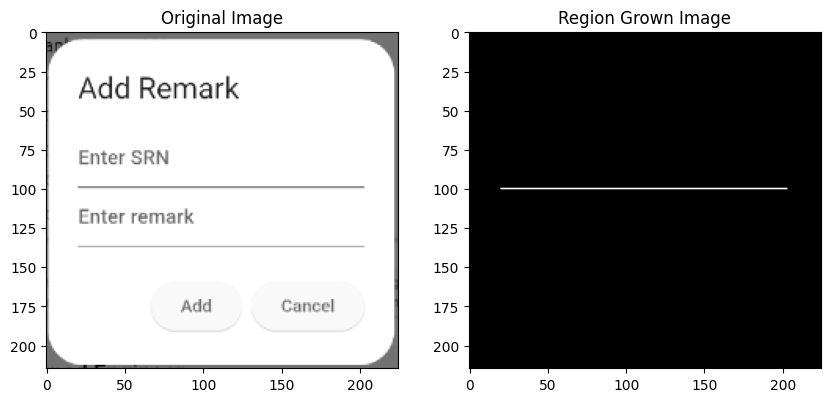

In [17]:
#Region growing

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function for region growing
def region_growing(img, seed_point, threshold=15):
    rows, cols = img.shape
    segmented_img = np.zeros((rows, cols), np.uint8)  # Initialize segmented image
    visited = np.zeros((rows, cols), np.bool_)        # Array to track visited pixels
    seed_value = img[seed_point]                      # Get the intensity value at seed point
    segmented_img[seed_point] = 255                   # Mark seed point as part of region
    visited[seed_point] = True                        # Mark seed point as visited
    stack = [seed_point]                              # Initialize stack with seed point

    while len(stack) > 0:
        current_point = stack.pop()
        x, y = current_point

        # Check neighboring pixels (4-connectivity)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            # Check if the new point is inside the image and not visited
            if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                visited[nx, ny] = True  # Mark as visited

                # Check if pixel intensity is within the threshold
                if abs(int(img[nx, ny]) - int(seed_value)) < threshold:
                    segmented_img[nx, ny] = 255  # Add pixel to region
                    stack.append((nx, ny))       # Add this point to stack to expand region

    return segmented_img

# Load input image (grayscale)
img = cv2.imread('/content/Screenshot 2024-07-22 164438.png', 0)

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found or failed to load.")
else:
    # Define a seed point (for example: pixel at row 100, col 100)
    seed_point = (100, 100)

    # Perform region growing
    segmented_img = region_growing(img, seed_point)

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img, cmap='gray')
    plt.title('Region Grown Image')

    plt.show()


(215, 225)
Original MRI Image:


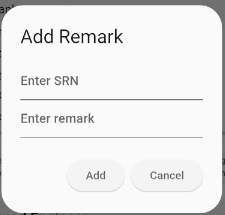

Segmented Tumor Regions:


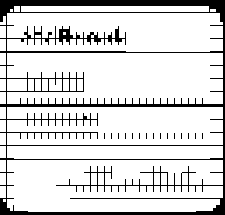

Bounding Boxes around Tumor Regions on Segmented Image:


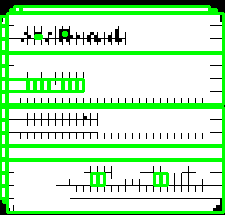

In [19]:
#Region splitting and merging

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/Screenshot 2024-07-22 164438.png'
image = cv2.imread(image_path, 0)  # Load image in grayscale

# Check if the image was loaded correctly
if image is None:
    print("Error: Image not found or failed to load.")
else:
    height, width = image.shape
    print(image.shape)

    # Parameters for splitting and merging
    threshold = 15  # Threshold for intensity difference to split
    min_size = 16   # Minimum size of a region (in pixels)

    # Function for splitting regions
    def split_region(x, y, w, h):
        sub_img = image[y:y+h, x:x+w]
        max_val = np.max(sub_img)
        min_val = np.min(sub_img)

        # Set stopping criteria for splitting
        if max_val - min_val < threshold or w * h <= min_size:
            return [(x, y, w, h)]

        # Split the region into four smaller regions
        mid_w, mid_h = w // 2, h // 2
        regions = []

        # Ensure valid dimensions for splitting
        if mid_w > 0 and mid_h > 0:
            regions += split_region(x, y, mid_w, mid_h)                # Top-left
            regions += split_region(x + mid_w, y, mid_w, mid_h)        # Top-right
            regions += split_region(x, y + mid_h, mid_w, mid_h)        # Bottom-left
            regions += split_region(x + mid_w, y + mid_h, mid_w, mid_h) # Bottom-right

        return regions

    # Function for creating segmented image through merging regions
    def merge_regions(regions):
        merged_image = np.zeros_like(image)  # Create a black background

        # For each region, assign the mean value to the region
        for (x, y, w, h) in regions:
            mean_val = np.mean(image[y:y+h, x:x+w])

            # Mark regions with intensity similar to tumors
            if mean_val > 150:  # Adjust this value based on your image
                merged_image[y:y+h, x:x+w] = 255  # Mark as tumor region
            else:
                merged_image[y:y+h, x:x+w] = 0  # Mark as background (black)

        return merged_image

    # Perform region splitting
    regions = split_region(0, 0, width, height)

    # Perform region merging (segmentation)
    segmented_image = merge_regions(regions)

    # Find contours of the tumor regions where the pixel value is 255
    contours, _ = cv2.findContours(segmented_image.astype(np.uint8), cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the segmented image to draw bounding boxes on it
    boxed_segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)

    # Iterate through the contours and draw bounding boxes around the tumors
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(boxed_segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box

    # Display the original, segmented, and bounding box images
    print("Original MRI Image:")
    cv2_imshow(image)

    print("Segmented Tumor Regions:")
    cv2_imshow(segmented_image)

    print("Bounding Boxes around Tumor Regions on Segmented Image:")
    cv2_imshow(boxed_segmented_image)


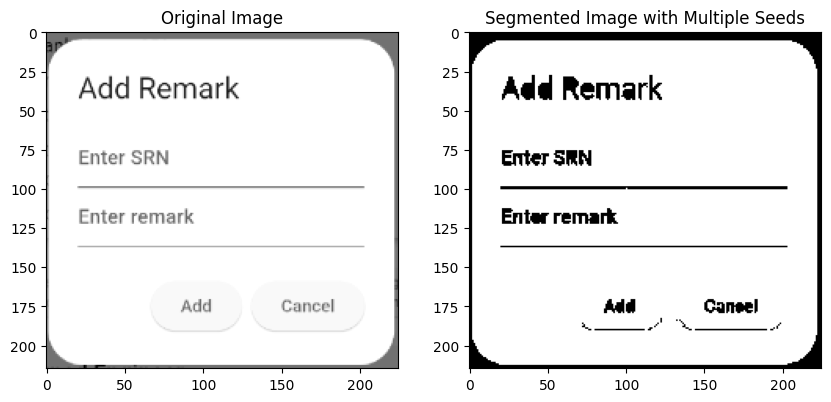

In [21]:
#Fixing Multiple Seed Points for Image Segmentation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for region growing with multiple seed points
def region_growing_multi_seeds(img, seed_points, threshold=15):
    rows, cols = img.shape
    segmented_img = np.zeros((rows, cols), np.uint8)  # Initialize segmented image
    visited = np.zeros((rows, cols), np.bool_)        # Track visited pixels

    stack = list(seed_points)  # Initialize stack with multiple seed points
    for seed_point in seed_points:
        segmented_img[seed_point] = 255
        visited[seed_point] = True

    while stack:
        x, y = stack.pop()

        # Check 4-connectivity neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                visited[nx, ny] = True
                if abs(int(img[nx, ny]) - int(img[x, y])) < threshold:
                    segmented_img[nx, ny] = 255
                    stack.append((nx, ny))

    return segmented_img

# Load grayscale image
img = cv2.imread('/content/Screenshot 2024-07-22 164438.png', 0)

# Multiple seed points
seed_points = [(100, 100), (150, 150), (200, 200)]

# Apply region growing
segmented_img = region_growing_multi_seeds(img, seed_points)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image with Multiple Seeds')
plt.show()

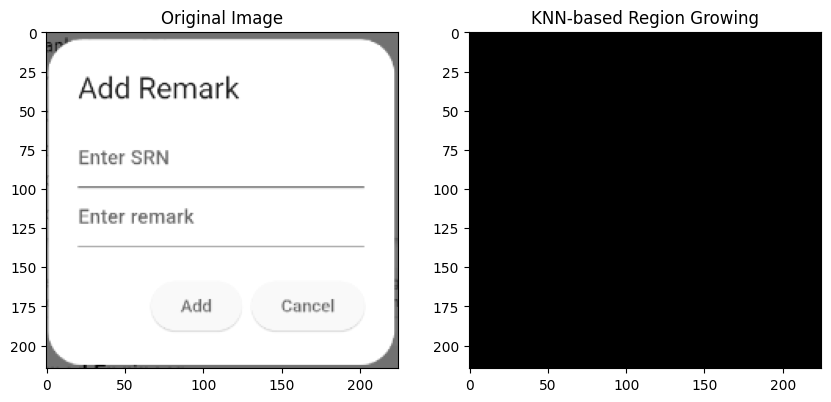

In [22]:
#KNN for Region Growing

import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Function for KNN-based region growing
def knn_region_growing(img, seed_points, seed_labels, k=3):
    rows, cols = img.shape
    knn = KNeighborsClassifier(n_neighbors=k)

    # Prepare data for KNN
    features = []
    labels = []
    for point, label in zip(seed_points, seed_labels):
        x, y = point
        intensity = img[x, y]
        features.append([intensity])
        labels.append(label)

    knn.fit(features, labels)

    segmented_img = np.zeros((rows, cols), np.uint8)

    for x in range(rows):
        for y in range(cols):
            pixel_value = img[x, y]
            predicted_label = knn.predict([[pixel_value]])[0]
            segmented_img[x, y] = 255 if predicted_label == 1 else 0  # Assign class 1 as region

    return segmented_img

# Load grayscale image
img = cv2.imread('/content/Screenshot 2024-07-22 164438.png', 0)

# Seed points and corresponding labels
seed_points = [(100, 100), (150, 150), (200, 200)]
seed_labels = [1, 0, 1]  # Example: label 1 for regions, 0 for background

# Apply KNN-based region growing
segmented_img = knn_region_growing(img, seed_points, seed_labels)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('KNN-based Region Growing')
plt.show()
